In [4]:
from evaluation import *
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
data_path = '../../stream_graph_data/built_networks_nx/'
out_path = '../../stream_graph_data/experiments/'

all_files = [f for f in listdir(data_path) if isfile(join(data_path, f))]

In [25]:
# data_path = '../../stream_graph_data/built_networks_nx/'
data_path = '../../stream_graph_data/test/'
out_path = '../../stream_graph_data/experiments/'

all_files = [f for f in listdir(data_path) if isfile(join(data_path, f))]

for f in all_files:
    network_name = f
    g = nx.read_gpickle(data_path + network_name)
    g.name = network_name
    
    info = nx.info(g)
    density = nx.density(g)
    print(info)
    print('density: ' + str(density))
          
    d = thresholdSearch(g, network_name = network_name, 
                    initial_start=0, initial_stop=1, initial_num=10, 
                    merging_start=0, merging_stop=1, merging_num=10, log=False)
    
        # turn scores (dict) into dataframe
    df = pd.DataFrame.from_dict(d, orient='index')

    # sort by score to see best score
    df = df.sort_values(by='score', ascending=False)
    initial_t = df.initial_threshold.iloc[0]
    merging_t = df.merging_threshold.iloc[0]
    highest_score = df.score.iloc[0]
    initial_clusters = df.clusters_found.iloc[0]
    clusters_merged = df.clusters_merged.iloc[0]
    final_clusters = df.remaining_clusters.iloc[0]
    
    print('initial_threshold: ' + str(initial_t))
    print('merging_threshold: ' + str(merging_t))
    print('highest_score:' + str(highest_score))
    print('initial_clusters:' + str(initial_clusters))
    print('clusters_merged:' + str(clusters_merged))
    print('remaining_clusters:' + str(final_clusters))
    
    communities = louvain(g)
    mod = evaluation.newman_girvan_modularity(g,communities)
    print('louvain: ' +  str(mod.score))
    print('')
    
    f = open('output.txt', 'a+')
    f.write('{}\n'.format(info))
    f.write('density: {}\n'.format(density))
    f.write('initial_threshold: {}\n'.format(initial_t))
    f.write('merging_threshold: {}\n'.format(merging_t))
    f.write('highest_score: {}\n'.format(highest_score))
    f.write('initial_cluster: {}\n'.format(initial_clusters))
    f.write('clusters_merged: {}\n'.format(clusters_merged))
    f.write('final_clusters: {}\n'.format(final_clusters))
    f.write('louvain_score: {}\n'.format(mod.score))
    f.write('\n')
    f.close()

  2%|▏         | 2/81 [00:00<00:06, 12.93it/s]

Name: harveytest2100.pkl
Type: Graph
Number of nodes: 100
Number of edges: 294
Average degree:   5.8800
density: 0.059393939393939395


  0%|          | 0/81 [00:00<?, ?it/s]

initial_threshold: 0.1111111111111111
merging_threshold: 0.1111111111111111
highest_score:0.5521368411310105
initial_clusters:18
clusters_merged:0
remaining_clusters:18
louvain: 0.6162362904345411

Name: harveytest2100 (copy).pkl
Type: Graph
Number of nodes: 100
Number of edges: 294
Average degree:   5.8800
density: 0.059393939393939395


100%|██████████| 81/81 [00:18<00:00,  4.46it/s]

initial_threshold: 0.1111111111111111
merging_threshold: 0.1111111111111111
highest_score:0.5521368411310105
initial_clusters:18
clusters_merged:0
remaining_clusters:18
louvain: 0.6162362904345411



##  Build networkx graph from file with edges per node

In [2]:
g = buildGraph(data_path, email)

Name: Email network
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458
Network density: 0.03311331787278746


## Twitter graphs, loaded from nx serialized objects

In [36]:
data_path = '../../stream_graph_data/built_networks_nx/'
network_name = 'aug25.pkl'

g = nx.read_gpickle(data_path + network_name)
g.name = network_name
print(nx.info(g))

Name: aug25.pkl
Type: Graph
Number of nodes: 13624
Number of edges: 7998300
Average degree: 1174.1486


In [37]:
nx.density(g)

0.08618869275213256

## findClusters example

In [3]:
first_th = 0.08
second_th = 0.005

fps, fmap = findClusters(g, first_th)
print('clusters found: ' + str(len(fmap)))

merged_fps, merged_fmap = mergeFingerprints(fps, fmap, second_th)
print('clusters merged: ' + str(len(fmap)-len(merged_fmap)))
print('remaining clusters: ' + str(len(merged_fmap)))

clusters found: 50
clusters merged: 8
remaining clusters: 42


In [29]:
data_path + network_name + 'graph.png'

'../../stream_graph_data/built_networks_nx/aug24.pklgraph.png'

## Calculate fitness scores

In [ ]:
d = thresholdSearch(g, network_name = network_name, 
                    initial_start=0, initial_stop=1, initial_num=10, 
                    merging_start=0, merging_stop=1, merging_num=10, log=False)

 93%|█████████▎| 75/81 [22:26:13<14:00:37, 8406.31s/it]

In [8]:
# load scores (dict) from pkl file
# with open(data_path + network_name + '.pkl', 'rb') as f:
#     d = pickle.load(f)
    
    # load scores (dict) from pkl file
with open('../../stream_graph_data/networks_ground_truth_communities/aug17_clusters.pkl', 'rb') as f:
    d = pickle.load(f)

In [32]:
# turn scores (dict) into dataframe
df = pd.DataFrame.from_dict(d, orient='index')

# sort by score to see best score
df = df.sort_values(by='score', ascending=True)
df.head()

,initial_threshold,merging_threshold,score,clusters_found,clusters_merged,remaining_clusters
80,1.0,1.000000,-0.000203,7416,0,7416
79,1.0,0.888889,0.000265,7416,1346,6070
78,1.0,0.777778,0.000269,7416,1356,6060
77,1.0,0.666667,0.000270,7416,1360,6056
75,1.0,0.444444,0.000271,7416,1363,6053


## CDlib evaluation

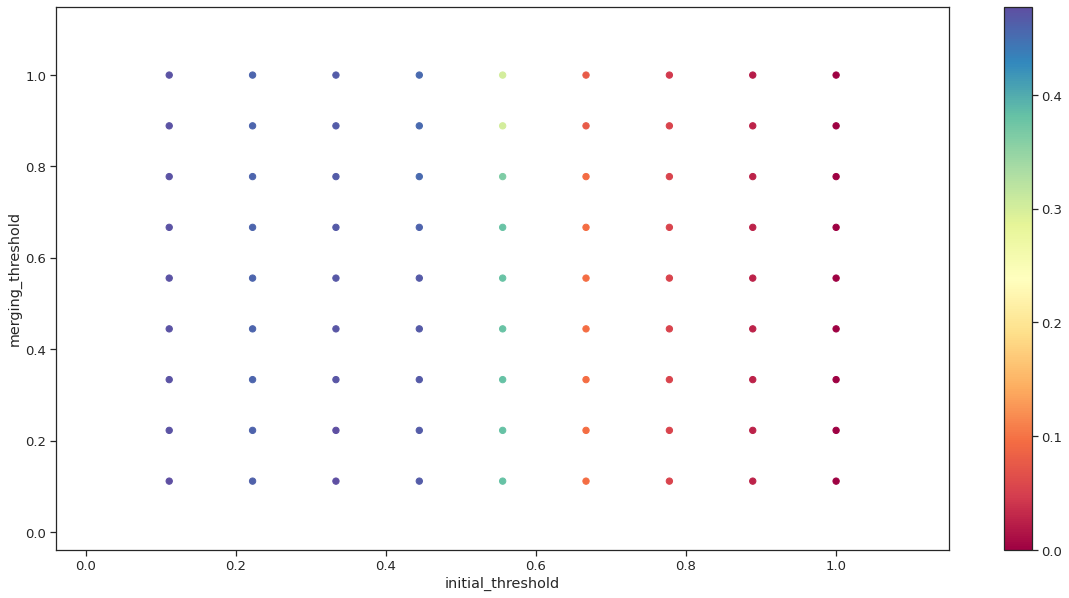

In [33]:
plotScores(df, network_name)

In [34]:
# email with Louvain
communities = louvain(g)
mod = evaluation.newman_girvan_modularity(g,communities)
mod.score

0.5053588352851804

## Plot and save graph as png

In [ ]:
plotGraph(g, network_name, data_path)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

points = plt.scatter(tips["total_bill"], tips["tip"],
                     c=tips["size"], s=75, cmap="BuGn")
plt.colorbar(points)

sns.regplot("total_bill", "tip", data=tips, scatter=False, color=".1")

In [ ]:
    # load scores (dict) from pkl file
with open('../../stream_graph_data/networks_ground_truth_communities/aug17_clusters.pkl', 'rb') as f:
    d = pickle.load(f)